In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

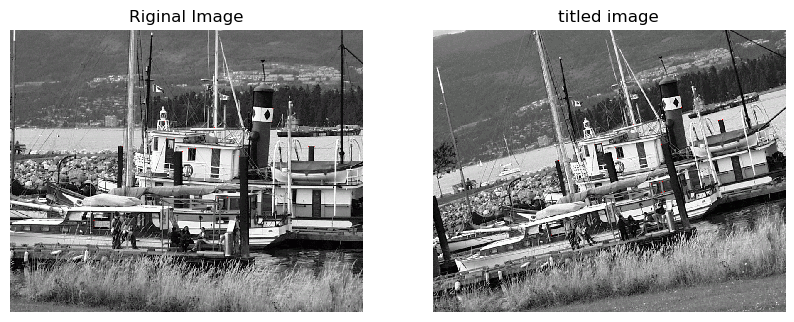

In [12]:
img1 = cv2.imread('boat1.png')
img2 = cv2.imread('boat2.png')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title('Riginal Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('titled image')
plt.axis('off') 
plt.show()



# Step 3: Convert images to grayscale
imgGray_1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
imgGray_2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

Here we now use the SIFT detect the keypoints .Instead of using Surf as OpenCv doesnt have this library we use SIFT(scal-invariant Feature transform). example pick from the opencv library :https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

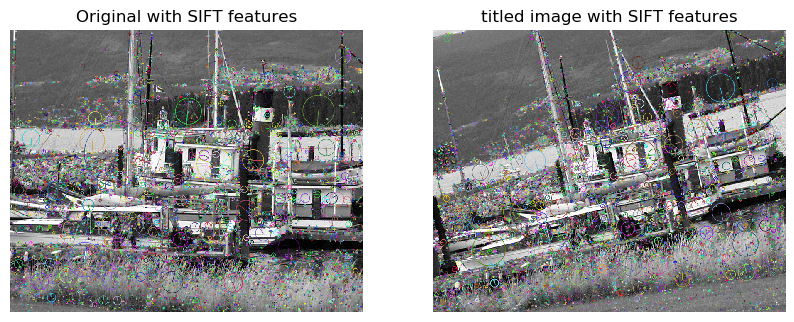

In [16]:
sift = cv2.SIFT_create() #instead of using Surf as OpenCv doesnt have this library we use SIFT(scal-invariant Feature transform)
kp1, des1 = sift.detectAndCompute(imgGray_1, None) # these lines create a list of keypoints(kp) and des is a numoy array , Each row in des1 is a descriptor vector corresponding to a keypoint in kp1
kp2, des2 = sift.detectAndCompute(imgGray_2, None)# 

# Step 5: Show detected features
img1_with_kp = cv2.drawKeypoints(imgGray_1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # insert those keypoints in the drawings
img2_with_kp = cv2.drawKeypoints(imgGray_2, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1_with_kp)
plt.title('Original with SIFT features')
plt.axis('off') 
plt.subplot(1, 2, 2)
plt.imshow(img2_with_kp)
plt.title('titled image with SIFT features')
plt.axis('off') 
plt.show()


Now with the Sift features, we will use Brute-Force matcher is simple. It takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned. In order to have lines of matches as shown on this link :https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html


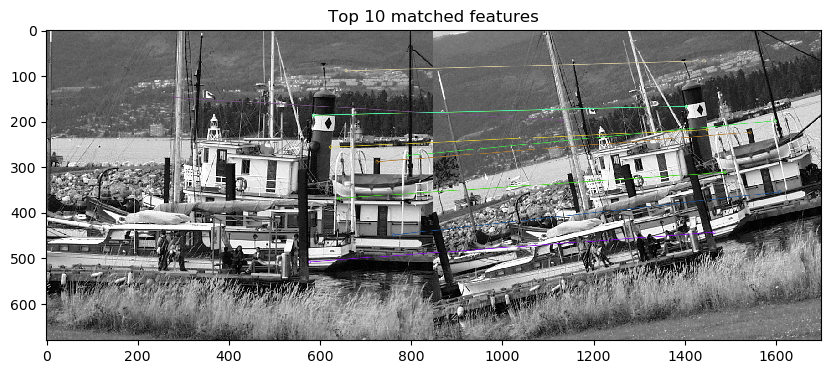

In [15]:
bf = cv2.BFMatcher()
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Step 7: Show matched features
match_img = cv2.drawMatches(imgGray_1, kp1, imgGray_2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10, 5))
plt.imshow(match_img)
plt.title('Top 10 matched features')

plt.show()

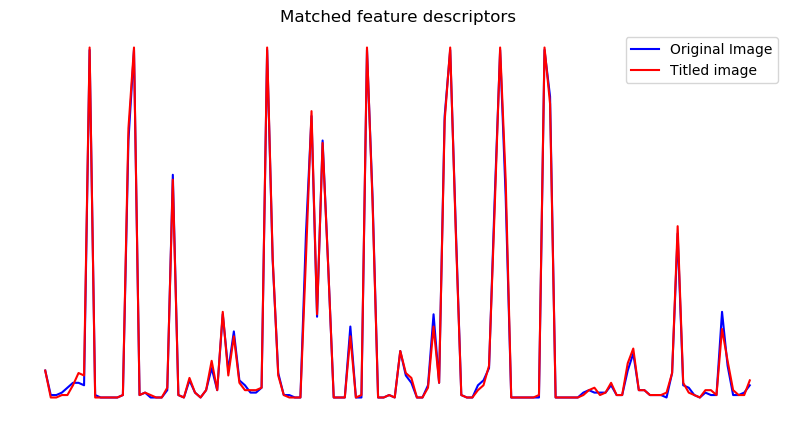

In [17]:
k = 0  # Index of matched feature to plot
plt.figure(figsize=(10, 5))
plt.plot(des1[matches[k].queryIdx], 'b')# is an index into one set of keypoints 1
plt.plot(des2[matches[k].trainIdx], 'r') #s an index into the set of keypoints 2
plt.title('Matched feature descriptors')
plt.legend(['Original Image', 'Titled image'])
plt.axis('off') 
plt.show()